In [3]:
%cd /content/drive/MyDrive/밑시딥/1권/ch4

/content/drive/MyDrive/밑시딥/1권/ch4


In [4]:
!pip3 install pickle5


In [5]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet



In [8]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼파라미터
iters_num = 500  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.04

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

In [9]:
for i in range(iters_num) :
    #미니 배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    #기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)

    #매개변수 갱신
    for key in ("W1", "b1", "W2", "b2") : 
        network.params[key] -= learning_rate*grad[key]

    #학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print(str(i+1)+"번째, train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

1번째, train acc, test acc | 0.09035, 0.0892
2번째, train acc, test acc | 0.10441666666666667, 0.1028
3번째, train acc, test acc | 0.10441666666666667, 0.1028
4번째, train acc, test acc | 0.10441666666666667, 0.1028
5번째, train acc, test acc | 0.11236666666666667, 0.1135
6번째, train acc, test acc | 0.09741666666666667, 0.0983
7번째, train acc, test acc | 0.1024, 0.1042
8번째, train acc, test acc | 0.11236666666666667, 0.1135
9번째, train acc, test acc | 0.09768333333333333, 0.0985
10번째, train acc, test acc | 0.12836666666666666, 0.1258
11번째, train acc, test acc | 0.09751666666666667, 0.0974
12번째, train acc, test acc | 0.11236666666666667, 0.1135
13번째, train acc, test acc | 0.11236666666666667, 0.1135
14번째, train acc, test acc | 0.11236666666666667, 0.1135
15번째, train acc, test acc | 0.09738333333333334, 0.0982
16번째, train acc, test acc | 0.11236666666666667, 0.1135
17번째, train acc, test acc | 0.09035, 0.0892
18번째, train acc, test acc | 0.09871666666666666, 0.098
19번째, train acc, test acc | 0.098716666

KeyboardInterrupt: ignored

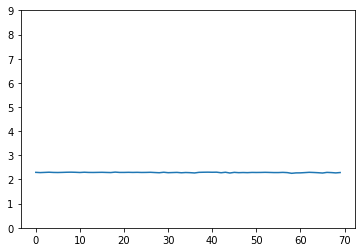

In [10]:
#neuralnet mnist train loss 출력
x = np.arange(0, len(train_loss_list))
y = train_loss_list
plt.plot(x,y)
plt.ylim(0, 9)
plt.show()

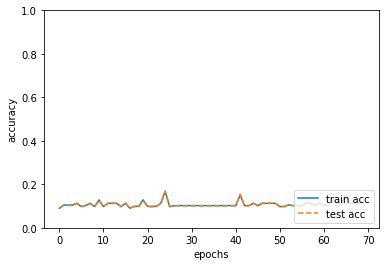

In [11]:
#  train_acc, test_acc 출력
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()